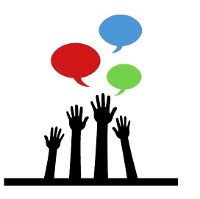

<h1><center>THE SPARKS FOUNDATION</center></h1>  
<h2><center><font color='cyan'>Graduate Rotational Internship Program</font></center></h2>

***

<h3><center>Data Science and Business Analytics Internship</center></h3>
<h3><center><font color='coral'>By:- Dhiraj Naganath Patil</font></center></h3>

---

<h2><center>Prediction Using Superwised Machine Learning</center></h2>
<h3><center>(Level-Beginner)</center></h3>

<h3><center><font color='blue'>Task1:- Simple Linear Regression</font></center></h3>

**In this task we have to predict the percentage of marks of an student based on the number of study hours.**

**In given dataset 'Hours' is independent variable and 'Scores' is a dependent variable.**

### Import all necessary library

In [1]:
# For mathematical calculation
import numpy as np                                        
# For dataframe operations
import pandas as pd
# For data visualisation
import seaborn as sn
# For plotting graphs
import matplotlib.pyplot as plt
# To set the backend of matplotlib to the 'inline' backend
%matplotlib inline
from IPython.display import Image
# To ignore any warnings
import warnings
warnings.filterwarnings('ignore')
# to run multiple line of code in single command
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity='all'

In [2]:
df=pd.read_csv('http://bit.ly/w-data',header=0)

**Shuffle the dataset**

In [3]:
df=df.sample(frac=1,random_state=123)

### EDA

In [4]:
# Preview of data
df.head()

,Hours,Scores
5,1.5,20
21,4.8,54
22,3.8,35
18,6.1,67
15,8.9,95


In [5]:
print('Rows,Columns=',df.shape)

Rows,Columns= (25, 2)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 5 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 600.0 bytes


**No missing value present in dataset**

In [7]:
# Statistical information about data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Average study hour=5 Hr, Average score=51**

Hours        AxesSubplot(0.125,0.536818;0.352273x0.343182)
Scores    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
dtype: object

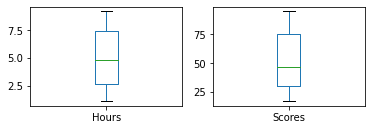

In [8]:
# Plot the boxplot for Outlier detection
df.plot(kind='box',subplots=True,layout=(2,2))

**No outlier present** 

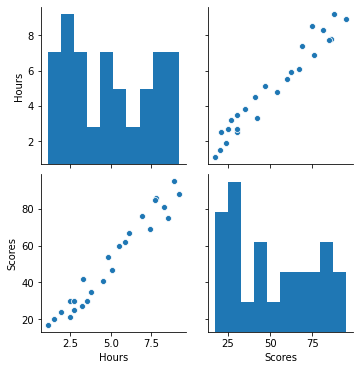

In [9]:
sn.pairplot(df)

**We can see there is linear relationship between 'Scores' and 'Hours'**

In [10]:
cols=df.columns
cor=df.corr(method='pearson')
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


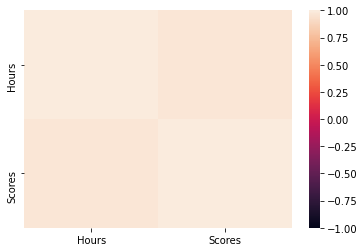

In [11]:
sn.heatmap(cor,vmin=-1,vmax=1,xticklabels=cols,yticklabels=cols)

**From heatmap it indicates that there is strong linear relationship between 'Hours' and 'Scores'**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.iloc[:,:-1]
Y=df.iloc[:,1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
print('X_train={},X_test={},Y_train={},Y_test={}'.format(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape))

X_train=(17, 1),X_test=(8, 1),Y_train=(17,),Y_test=(8,)


**Let's find out which algorithm gives best result using KFold cross validation**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [15]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('DT',DecisionTreeRegressor()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('RandomReg',RandomForestRegressor()))

In [16]:
# Evaluate each model
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=2,shuffle=True,random_state=123)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg='%s: %f (%f)'%(name,cv_results.mean(),cv_results.std())
    print(msg)


LR: 0.924721 (0.031159)
DT: 0.654282 (0.152814)
KNN: 0.558434 (0.176295)
RandomReg: 0.719396 (0.029433)


**So from above, we can conclude that Linear Regression Algorithm gives best result**

In [17]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

**Let's make prediction on test dataset**

In [18]:
Y_pred=lr.predict(X_test)

In [19]:
predictionDataFrame=pd.DataFrame({'Actual_Score':Y_test,'Predicted_Score':Y_pred})
predictionDataFrame

,Actual_Score,Predicted_Score
8,81,83.260149
6,88,91.931161
23,76,69.771908
10,85,77.479474
20,30,29.307185
4,30,37.014751
11,62,60.137450
12,41,46.649209


**Let's evaluate our model using different metrics**

In [20]:
print('\n Mean Squared Error (MSE) =>',metrics.mean_squared_error(Y_test,Y_pred))
print('\n Root Mean Squared Error (RMSE) =>',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('\n Mean Absolute Error (MAE) =>',metrics.mean_absolute_error(Y_test,Y_pred))
print('\n R Square Value (R^2) =>',metrics.r2_score(Y_test,Y_pred))


 Mean Squared Error (MSE) => 25.12238999095636

 Root Mean Squared Error (RMSE) => 5.012224056340295

 Mean Absolute Error (MAE) => 4.394906645901868

 R Square Value (R^2) => 0.9527094044112707


**From we can see that R-Squared value=0.95 means that 95% variation of the 'Score' variable is determined by 'Hours' variable**

**Let's predict score of the student who usually do study 9.25 Hr/Day**

In [21]:
lr.predict([[9.25]])

array([92.41288409])

*Wow! that's cool... Above 90%, Good Enough*